In [8]:
import pandas as pd # pandas is a data manipulation library
import numpy as np #provides numerical arrays and functions to manipulate the arrays efficiently
# import random
import matplotlib.pyplot as plt # data visualization library
from wordcloud import WordCloud, STOPWORDS #used to generate world cloud
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# lets explore movies.csv
df= pd.read_csv('ml-25m/movies.csv')
df.shape

(62423, 3)

In [3]:
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
## Peliculas que tiene el dataset
movies = df['movieId'].unique().tolist()
len(movies)

62423

In [5]:
ratings_data=pd.read_csv('ml-25m/ratings.csv',sep=',')
ratings_data.shape

(25000095, 4)

In [7]:
ratings_data.describe()

,userId,movieId,rating,timestamp
count,2.500010e+07,2.500010e+07,2.500010e+07,2.500010e+07
mean,8.118928e+04,2.138798e+04,3.533854e+00,1.215601e+09
std,4.679172e+04,3.919886e+04,1.060744e+00,2.268758e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.196000e+03,3.000000e+00,1.011747e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.198868e+09
75%,1.215570e+05,8.623000e+03,4.000000e+00,1.447205e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


In [35]:
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [9]:
print("Rating min", ratings_data['rating'].min() )
print("Rating max", ratings_data['rating'].max() )

Rating min 0.5
Rating max 5.0


In [10]:
# revisar nulos
df.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [11]:
tags_data=pd.read_csv('ml-25m/tags.csv',sep=',')
tags_data.shape

(1093360, 4)

In [12]:
tags_data.isnull().any()

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

In [15]:
tags_data=tags_data.dropna()
unique_tags=tags_data['tag'].unique().tolist()
len(unique_tags)

73050

In [17]:
# ver las peliculas de romance
rom_movies=df['genres'].str.contains('Romance')
df[rom_movies].head()

,movieId,title,genres
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
6,7,Sabrina (1995),Comedy|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
14,15,Cutthroat Island (1995),Action|Adventure|Romance


In [18]:
rom_movies.shape

(62423,)

In [19]:
movie_data_ratings_data=df.merge(ratings_data,on = 'movieId',how = 'inner')
movie_data_ratings_data.head(3)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1141415820
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1439472215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1573944252


In [20]:
## las que tienen ratings más altos
high_rated= movie_data_ratings_data['rating']>4.0
movie_data_ratings_data[high_rated].head(10)

,movieId,title,genres,userId,rating,timestamp
10,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,36,5.0,857131378
22,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,75,5.0,1537207651
25,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,86,5.0,945462775
26,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,90,5.0,863538043
27,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,93,5.0,1496543050
28,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,95,5.0,1510351023
29,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,96,5.0,1443313447
30,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,98,5.0,1450047199
33,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,111,4.5,1167221538
35,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,120,5.0,956264593


In [22]:
# top 25 peliculas ratings
most_rated = movie_data_ratings_data.groupby('title').size().sort_values(ascending=False)[:25]
most_rated.head(25)

title
Forrest Gump (1994)                                                               81491
Shawshank Redemption, The (1994)                                                  81482
Pulp Fiction (1994)                                                               79672
Silence of the Lambs, The (1991)                                                  74127
Matrix, The (1999)                                                                72674
Star Wars: Episode IV - A New Hope (1977)                                         68717
Jurassic Park (1993)                                                              64144
Schindler's List (1993)                                                           60411
Braveheart (1995)                                                                 59184
Fight Club (1999)                                                                 58773
Terminator 2: Judgment Day (1991)                                                 57379
Star Wars: Episode V - The

In [23]:
#define a function that counts the number of times each genre appear:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [26]:
genre_labels = set()
for s in df['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [29]:
#counting how many times each of genres occur:
keyword_occurences, dum = count_word(df, 'genres', genre_labels)
keyword_occurences

[['Drama', 25606],
 ['Comedy', 16870],
 ['Thriller', 8654],
 ['Romance', 7719],
 ['Action', 7348],
 ['Horror', 5989],
 ['Documentary', 5605],
 ['Crime', 5319],
 ['(no genres listed)', 5062],
 ['Adventure', 4145],
 ['Sci-Fi', 3595],
 ['Children', 2935],
 ['Animation', 2929],
 ['Mystery', 2925],
 ['Fantasy', 2731],
 ['War', 1874],
 ['Western', 1399],
 ['Musical', 1054],
 ['Film-Noir', 353],
 ['IMAX', 195]]

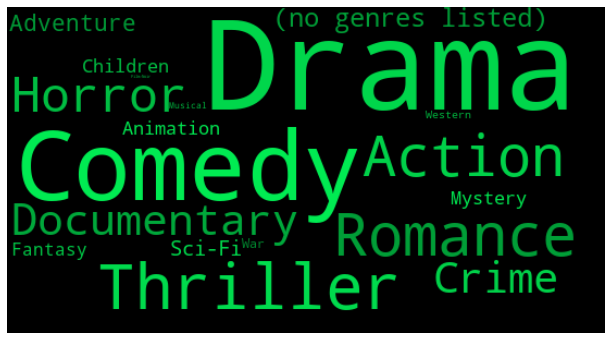

In [32]:
# Function that control the color of the words
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


#Finally, the result is shown as a wordcloud:
words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

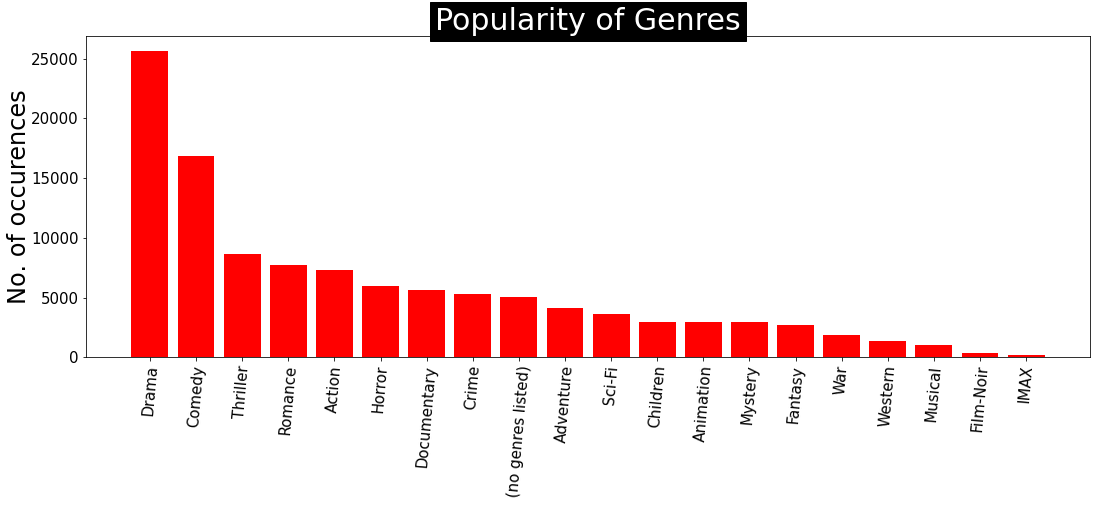

In [33]:
# lets display the same result in the histogram
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

In [37]:
df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


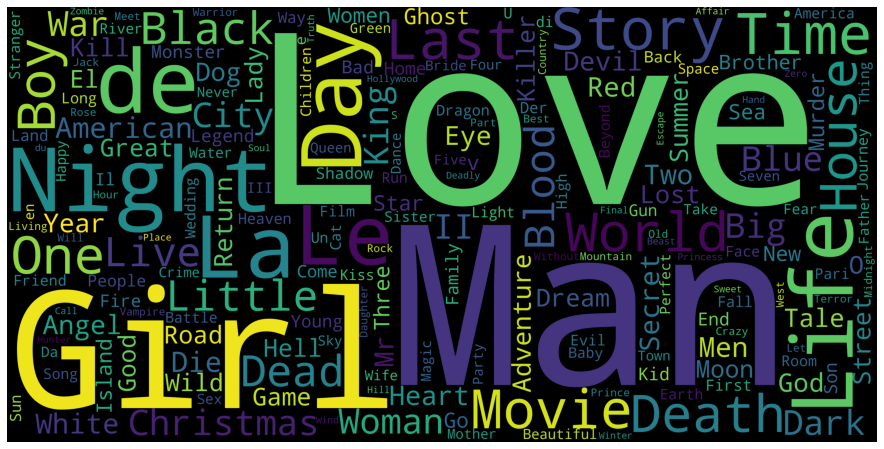

In [38]:
# Create a wordcloud of the movie titles
df['title'] = df['title'].fillna("").astype('str')
title_corpus = ' '.join(df['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

## Coger usuarios activos

In [40]:
user_counts = ratings_data['userId'].value_counts(ascending=False)
active_users = user_counts.loc[user_counts >= 5].index.tolist()
ratings_data = ratings_data.loc[ratings_data.userId.isin(active_users)]
active_users=ratings_data['userId'].unique()
active_users

array([     1,      2,      3, ..., 162539, 162540, 162541], dtype=int64)

In [41]:
csv_name = "active_user.csv"
pd.DataFrame(active_users).to_csv(csv_name, index=False)

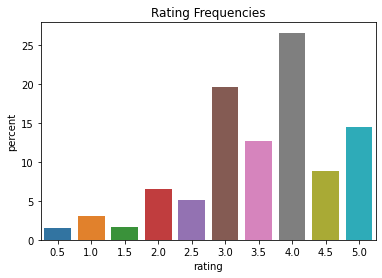

In [9]:

# <!-- collapse=True -->
norm_counts = (
   ratings_data['rating']
    .value_counts(normalize=True, sort=False)
    .multiply(100)
    .reset_index()
    .rename(columns={'rating': 'percent', 'index': 'rating'})
)
ax = sns.barplot(x='rating', y='percent', data=norm_counts)
ax.set_title('Rating Frequencies')
plt.show()